In [65]:
from geopandas import GeoDataFrame
import _pickle as cPickle
from shapely.geometry import Polygon, mapping
from shapely.geometry import Point 
import geopandas as gpd
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np
import folium as fo
import shapely as sh
import unicodedata as uco
import pysal as ps
from shapely.geometry import Point
from math import sin,cos,atan,acos,asin,atan2,sqrt,pi, modf
fiona.supported_drivers;
%matplotlib inline

In [79]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 500D-F8B2

 Directory of C:\Users\gery\Hackaton

01.12.2018 г.  13:50    <DIR>          .
01.12.2018 г.  13:50    <DIR>          ..
01.12.2018 г.  11:39    <DIR>          .ipynb_checkpoints
01.12.2018 г.  13:50           187 422 Subway.ipynb
               1 File(s)        187 422 bytes
               3 Dir(s)   6 793 621 504 bytes free


In [42]:
kvartali = gpd.read_file('E:/Hackathon/Naselenie_kvartali/Naselenie_kvartali.shp')
kvartali['centroid'] = kvartali['geometry'].centroid

In [67]:
kvartali.tail()

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,Educ2,Educ3,Educ4,Educ5,Area_m2,X,Y,geometry,centroid,subway_distance
569,Хидропарк Искър - дефилето,Нови Искър / Кремиковци,ГР.НОВИ ИСКЪР,0,2,0,0,0,0,0,...,0,0,0,0,827913.686864,693080.116436,4.745540e+06,"POLYGON ((693322.4513810587 4745938.279554162,...",POINT (693080.116436454 4745540.303905676),15873.006893
570,Западен парк - разш. Малка Коньовица,Красна поляна,None,0,0,0,0,0,0,0,...,0,0,0,0,286300.975811,682305.643283,4.730733e+06,"POLYGON ((682655.8106121747 4730602.105619907,...",POINT (682305.6432831471 4730732.976070578),7919.101538
571,в.з. Бистрица - разш. Цонкина махала,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,172113.623116,693900.904610,4.716220e+06,"POLYGON ((693681.4985664311 4716520.441807601,...",POINT (693900.9046099099 4716219.848816869),14208.531326
572,в.з. Бистрица - разш. изток,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,549607.194293,694658.416299,4.717356e+06,"POLYGON ((694704.7256226789 4717024.309848383,...",POINT (694658.4162990791 4717355.711382726),13350.020413
573,м. бул.Цариградско ш. 7-11км юг (ХМС БАН),Младост,None,0,0,0,0,0,0,0,...,0,0,0,0,841842.655311,695933.819104,4.724620e+06,"POLYGON ((696802.4651822472 4724043.90409242, ...",POINT (695933.8191042151 4724619.863518977),7829.022708


In [59]:
kvartali.to_csv("E:/Hackathon/kvartali_subway_distance.csv") 


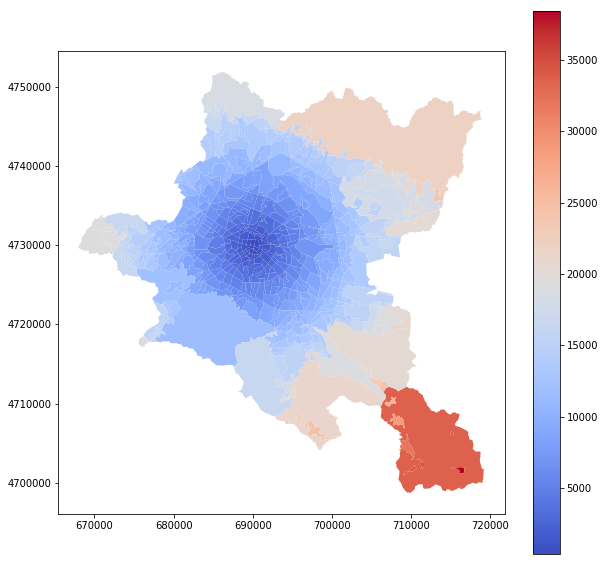

In [66]:
subway_distance_plot = kvartali.plot(column= 'subway_distance', cmap='coolwarm', legend=True,figsize=(10, 10))


In [64]:
subway_distance_plot

In [26]:
subway_stops = gpd.read_file('E:/Hackathon/Subway/Subway_stops/Subway_stops.shp')

In [30]:
subway_stops.head()

,Id,Sub_stop,Passengers,geometry
0,0,Обеля,8688,POINT (686280.6576405559 4734505.601082372)
1,0,Сливница,11314,POINT (685173.4373162109 4732967.193743519)
2,0,Люлин,18212,POINT (684815.3210828749 4732036.550271446)
3,0,Западен парк,11304,POINT (685959.0214376552 4731224.582505362)
4,0,Вардар,11734,POINT (687123.2273072368 4730692.085859412)


In [78]:
all_distances = []

for index, row in kvartali.iterrows():
    a = [row['centroid'].x, row['centroid'].y] 
    print(row['RegName'])
    
    for index_sp, row_sp in subway_stops.iterrows():
        each_stop_to_each_neigh = []
        
        b = [row_sp['geometry'].x, row_sp['geometry'].y]
        
        each_dist =  getDistance(a,b)
        each_stop_to_each_neigh.append(each_dist)  
    
    nearest_stop=min(each_stop_to_each_neigh)
    print(nearest_stop)

    all_distances.append(nearest_stop)
         


Зона за отдих Шишмановски манастир
38436.205470621
в.з. Татарски брод
34555.48055509801
Панчарево, в.з.Лавандулите
34737.5252353422
Манастир Св. Илия
34420.53542219416
Панчарево, в.з. Щъркелово гнездо
32033.758807985032
Хидропарк Искър - Вододайна зона яз. Искър
33584.36782148214
м. Пасарел
28579.265601397885
с. Плана
24628.86787058057
с. Железница, в.з. Звездана (Църквище)
22615.667715408865
с. Железница, в.з. Елата - Кошарите
22368.519597384224
м. Язовир Искър
26230.823737773142
с. Железница - махала Чемерник" и "Цареви кошари"
19550.084230128377
с.Долни Пасарел, в.з. Расул
24056.64067167779
с.  Долни Пасарел
22933.815419041013
Лозенска планина
20576.89470108039
с. Железница
18047.856349759146
в.з. Долни Пасарел
20752.077084207493
с. Кокаляне
15420.83600775777
в.з. Кокаляне - Бачол
15849.923406492435
в.з. Кокаляне
16227.258946945707
с. Бистрица, ж.г. Планински гледки
13963.760682581838
Панчарево, в.з. Църнокос
14468.667194959711
в.з. Бистрица - Цонкина махала
13463.572766118476
с. Би

450.9473136211076
Хвостохранилище Богров - Лъката
16600.805551767757
Разсадник Мало Бучино
11669.960642632495
ЦГЧ Зона А - изток
905.6866708599456
м. Подуяне-Център
2382.6000279469395
ж.к. Сердика
1919.791685522201
Бивши казарми ГУСВ м. Смърдан
6862.900383950177
ЦГЧ Зона Г12
1593.3837095155943
ж.к. Сухата река - север
3826.5924247667203
ЦГЧ Зони Б2 1 и 2
372.1511702985431
ЖП Ареал - Подуяне  (част 2)
2603.9068803189675
кв. Васил Левски - юг
4847.7333012662275
гр. Банкя, кв. Градоман - разширение
15587.158192126906
ЦГЧ Зона Б5-3+
829.283915717754
Люлин планина изток
12032.15365839753
м.Голямата локва-търговски парк 2
11157.650477339907
гр. Банкя, в.з. Градоман
14950.47502351567
ЦГЧ Зона Б5+
1326.967200451246
Хидропарк Искър - част Летище север
8127.140090938062
Летищен к-с София
7202.838081347655
ж.к. Факултета
4748.672085408215
ЦГЧ Зона Б19+
1853.5227021519802
зем. земи кв. Враждебна -Батарея
9678.947086515213
с. Мало Бучино, м. Кошарите
14431.17280307728
ж.к. Красна поляна - част 1 и 

14618.69895303682
с. Мрамор и ПСЗ
10379.466251089274
СОП север - м. Севладица
12533.932455392267
с. Мировяне - разширение
9963.60845967222
с. Локорско, м. Цигански гробища
14202.820666435451
с. Подгумер, стопански двор
12587.165769412999
с. Войнеговци - разширение
13466.138774234953
с. Локорско,м. Турченица
16162.943109685608
с.Подгумер разширение
12424.117518745028
с. Мировяне
10409.278136822435
с. Подгумер, м. Хумни дол
13131.846896336037
с. Мрамор - зем. земи
11151.69980322968
с. Войнеговци
13995.939583089408
в.з. Бранчовица
14797.09373351952
зем. земи - с. Подгумер, Войнеговци, Локорско
13113.46419129649
с. Подгумер
13545.722409456876
с. Подгумер -  Пясъчни кариери
14480.09801218149
с. Войнеговци, в.з.Манчов валог
16043.27615620666
гр. Нови Искър - кв. Славовци - разширение
11100.347763452226
гр. Нови Искър - кв. Кумарица
11742.095031928127
с. Подгумер, в.з.Целините
14769.961093753314
гр. Нови Искър - кв. Гниляне
12867.114535723069
Подгумерски манастир Свети Димитър
14652.535227749

In [57]:
kvartali["subway_distance"] = all_distances


In [44]:
def getDistance(loc1, loc2):

    lat1, lon1 = loc1
    lat2, lon2 = loc2
   
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    c = (lon2 - lon1)**2 + (lat2-lat1)**2
    dis = sqrt(c)
    return dis